# **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import fileinput
import warnings
warnings.filterwarnings('ignore')
import os

pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

# **2. Loading Data**

In [2]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

train_arff_file = './dataset/NSL-KDD/nsl-kdd/KDDTrain+.txt'
test_arff_file = './dataset/NSL-KDD/nsl-kdd/KDDTest+.txt'

df_train = pd.read_csv(train_arff_file, header=None,names=columns)
df_test = pd.read_csv(test_arff_file,header=None,names=columns)

# **3. Explanation of Dataset attributes/features:**

* Duration: duration of connection(in seconds)
* protocol_type: type of protocol (tcp, icmp, udp)
* Service: Network type (private, ftp_data, eco_i, telnet, http, smtp, ftp, ldap, pop_3, courier, discard, ecr_i, imap4, domain_u, mtp, systat, iso_tsap, other, csnet_ns, finger, uucp, whois, netbios_ns, link, Z39_50, sunrpc, auth, netbios_dgm, uucp_path, vmnet, domain, name, pop_2, http_443, urp_i, login, gopher, exec, time, remote_job, ssh, kshell, sql_net, shell, hostnames, echo, daytime, pm_dump, IRC, netstat, ctf, nntp, netbios_ssn, tim_i, supdup, bgp, nnsp, rje, printer, efs, X11, ntp_u, klogin, tftp_u)
* Flag: Flag status (REJ, SF, RSTO, S0, RSTR, SH, S3, S2, S1, RSTOS0, OTH)
* Src_bytes: Number of bytes transferred from source to destination
* Dst_bytes: Number of bytes transferred from destination to source
* Land: If connection is to same host land=1, else 0
* Wrong_fragment: Number of wrong fragments (0, 1, 3)
* Urgent: Number of urgent packets (0, 1, 2, 3)
* Hot: Number of “hot” indicators (0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 15, 18, 19, 22, 30, 101)
* Num_failed_logins: Number of failed logins (0, 1, 2, 3, 4)
* Logged_in: If logged in logged_in=1, else 0
* num_compromised: Number of compromised conditions (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 23, 25, 36, 49, 57, 165, 381, 611, 796)
* root_shell: If root shell is obtained root_shell=1, else 0
* su_attempted: If “su root” accesses, su_attempted=1, else 0
* num_root: Number of accessed roots (0, 1, 2, 3, 4, 5, 7, 8, 9, 17, 23, 26, 31, 45, 51, 145, 173, 401, 684, 878)
* num_file_creations: Number of file creations (0, 1, 2, 3, 4, 5, 6, 7, 100)
* num_shells: Number of shell prompt (0, 1, 2, 5)
* num_access_files: Number of operations on access files (0, 1, 2, 3, 4)
* num_outbound_cmds: Number of outbound commands
* is_host_login: If login is hot is_host_login=1, else 0
* is_guest_login: If login is guest is_guest_login=1, else 0
* Count No.: Number of connections to the same host in last 2 seconds
* srv_count: Number of connections to the same service in last 2 seconds
* serror_rate: Percentage of connection with syn error
* srv_serror_rate: Percentage of connection with syn error
* rerror_rate: Percentage of connection with rej error
* srv_rerror_rate: Percentage of connection with rej error
* same_srv_rate: Percentage of connection of same service
* diff_srv_rate: Percentage of connection of different service
* srv_diff_host_rate: Percentage of connection of different hosts
* dst_host_count: Number of connections of same destination host
* dst_host_srv_count: Number of connections of same destination host and service
* dst_host_same_srv_rate: Percentage of connections having same destination host and service
* dst_host_diff_srv_rate: Percentage of connections having different service on current host
* dst_host_same_src_port_rate: Percentage of connections of current host having same src port
* dst_host_srv_diff_host_rate: Percentage of connection of same service and different hosts
* dst_host_serror_rate: Percentage of connections of current host having S0 error 
* dst_host_srv_serror_rate: Percentage of connections of current host of a service having S0 error 
* dst_host_rerror_rate: Percentage of connections of current host that have rst error 
* dst_host_srv_rerror_rate: Percentage of connections of current host of service that have rst error 
* Attack: Type of attack (apache2, back, buffer_overflow, ftp_write, guess_passwd, httptunnel, imap, ipsweep, land, loadmodule, mailbomb, mscan, multihop, named, neptune, nmap, normal, perl, phf, pod, portsweep, processtable, ps, rootkit, saint, satan, sendmail, smurf, snmpgetattack, snmpguess, sqlattack, teardrop, udpstorm, warezmaster, worm, xlock, xsnoop, xterm) 
* Level: Threat level of the attack (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

for Level:
* 0: No threat or an informational level where no action is required.
* 1 to 5: Low threat levels, which might indicate minimal risk or impact, possibly affecting non-critical systems or involving minimal exploitability.
* 6 to 10: Medium threat levels, possibly affecting systems with moderate importance or presenting a reasonable level of risk if exploited.
* 11 to 15: High threat levels, indicating a significant risk with potential to affect critical systems or data significantly.
* 16 to 20: Very high threat levels, often associated with severe impacts on security, potentially leading to widespread disruption or high-level data breaches.
* 21: Critical threat level, typically used for the most severe and imminent threats that require immediate and comprehensive response

# **4. Data Preparation**

In [3]:
len(df_train)

125973

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
# df_test.info()

In [6]:
df_train.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised     root_shell   su_attempted  \
count  125973.000000    125973.000000  125973.000000  125973.000000   
mean        0.395736         0.279250       0.001342       0.001103   
std         0.489010        23.942042       0.036603       0.045154   
min         0.000000         0.000000       0.000000       0.000000   
25%         0.000000         0.000000       0.000000       0.000000   
50%         0.000000         0.000000       0.000000       0.000000   
75%         1.000000         0.000000       0.000000       0.000000   
max         1.000000      7479.000000       1.000000       2.000000   

            num_root  num_file_creations     num_shells  num_access_files  \
count  125973.000000       125973.000000  125973.000000     125973.000000   
mean        0.302192            0.012669       0.000413          0.004096   
std        24.399618            0.483935       0.022181          0.099370   
min         0.000000            0.000000       0.000000          0.000000   
25%         0.000000            0.000000       0.000000          0.000000   
50%         0.000000            0.000000       0.000000          0.000000   
75%         0.000000            0.000000       0.000000          0.000000   
max      7468.000000           43.000000       2.000000          9.000000   

       num_outbound_cmds  is_host_login  is_guest_login          count  \
count           125973.0  125973.000000   125973.000000  125973.000000   
mean                 0.0       0.000008        0.009423      84.107555   
std                  0.0       0.002817        0.096612     114.508607   
min                  0.0       0.000000        0.000000       0.000000   
25%                  0.0       0.000000        0.000000       2.000000   
50%                  0.0       0.000000        0.000000      14.000000   
75%                  0.0       0.000000        0.000000     143.000000   
max                  0.0       1.000000        1.000000     511.000000   

           srv_count    serror_rate  srv_serror_rate    rerror_rate  \
count  125973.000000  125973.000000    125973.000000  125973.000000   
mean       27.737888       0.284485         0.282485       0.119958   
std        72.635840       0.446456         0.447022       0.320436   
min         0.000000       0.000000         0.000000       0.000000   
25%         2.000000       0.000000         0.000000       0.000000   
50%         8.000000       0.000000         0.000000       0.000000   
75%        18.000000       1.000000         1.000000       0.000000   
max       511.000000       1.000000         1.000000       1.000000   

       srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
count    125973.000000  125973.0

In [7]:
df_test.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.150328      0.496659   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised    root_shell  su_attempted      num_root  \
count     22544.000000  22544.000000  22544.000000  22544.000000   
mean          0.119899      0.002440      0.000266      0.114665   
std           7.269597      0.049334      0.021060      8.041614   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max         796.000000      1.000000      2.000000    878.000000   

       num_file_creations    num_shells  num_access_files  num_outbound_cmds  \
count        22544.000000  22544.000000      22544.000000            22544.0   
mean             0.008738      0.001153          0.003549                0.0   
std              0.676842      0.048014          0.067829                0.0   
min              0.000000      0.000000          0.000000                0.0   
25%              0.000000      0.000000          0.000000                0.0   
50%              0.000000      0.000000          0.000000                0.0   
75%              0.000000      0.000000          0.000000                0.0   
max            100.000000      5.000000          4.000000                0.0   

       is_host_login  is_guest_login         count     srv_count  \
count   22544.000000    22544.000000  22544.000000  22544.000000   
mean        0.000488        0.028433     79.028345     31.124379   
std         0.022084        0.166211    128.539248     89.062532   
min         0.000000        0.000000      0.000000      0.000000   
25%         0.000000        0.000000      1.000000      1.000000   
50%         0.000000        0.000000      8.000000      6.000000   
75%         0.000000        0.000000    123.250000     16.000000   
max         1.000000        1.000000    511.000000    511.000000   

        serror_rate  srv_serror_rate   rerror_rate  srv_rerror_rate  \
count  22544.000000     22544.000000  22544.000000     22544.000000   
mean       0.102924         0.103635      0.238463         0.235179   
std        0.295367         0.298332      0.416118         0.416215   
min        0.000000         0.000000      0.000000         0.000000   
25%        0.000000         0.000000      0.000000         0.000000   
50%        0.000000         0.000000      0.000000         0.000000   
75%        0.000000         0.000000      0.250000         0.072500   
max        1.000000         1.000000      1.000000         1.000000   

       same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_ho

### We notice that num_outbound_cmds equals 0 for all the individuals of both datasets so we will drop it

In [8]:
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)

## i. Remove duplicates

In [9]:
print(df_test.shape)
df_test = df_test.drop_duplicates()
print(df_test.shape)

(22544, 42)
(22544, 42)


In [10]:
print(df_train.shape)
df_train = df_train.drop_duplicates()
print(df_train.shape)

(125973, 42)
(125973, 42)


### We have no duplicated in both the training an the testing datasets

## ii. Dealing with Missing values

In [11]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [12]:
missing_percentage(df_test)

Total  Percent
duration                         0      0.0
dst_host_srv_count               0      0.0
serror_rate                      0      0.0
srv_serror_rate                  0      0.0
rerror_rate                      0      0.0
srv_rerror_rate                  0      0.0
same_srv_rate                    0      0.0
diff_srv_rate                    0      0.0
srv_diff_host_rate               0      0.0
dst_host_count                   0      0.0
dst_host_same_srv_rate           0      0.0
protocol_type                    0      0.0
dst_host_diff_srv_rate           0      0.0
dst_host_same_src_port_rate      0      0.0
dst_host_srv_diff_host_rate      0      0.0
dst_host_serror_rate             0      0.0
dst_host_srv_serror_rate         0      0.0
dst_host_rerror_rate             0      0.0
dst_host_srv_rerror_rate         0      0.0
attack                           0      0.0
srv_count                        0      0.0
count                            0      0.0
is_guest_login                   0      0.0
is_host_login                    0      0.0
service                          0      0.0
flag                             0      0.0
src_bytes                        0      0.0
dst_bytes                        0      0.0
land                             0      0.0
wrong_fragment                   0      0.0
urgent                           0      0.0
hot                              0      0.0
num_failed_logins                0      0.0
logged_in                        0      0.0
num_compromised                  0      0.0
root_shell                       0      0.0
su_attempted                     0      0.0
num_root                         0      0.0
num_file_creations               0      0.0
num_shells                       0      0.0
num_access_files                 0      0.0
level                            0      0.0

In [13]:
missing_percentage(df_train)

Total  Percent
duration                         0      0.0
dst_host_srv_count               0      0.0
serror_rate                      0      0.0
srv_serror_rate                  0      0.0
rerror_rate                      0      0.0
srv_rerror_rate                  0      0.0
same_srv_rate                    0      0.0
diff_srv_rate                    0      0.0
srv_diff_host_rate               0      0.0
dst_host_count                   0      0.0
dst_host_same_srv_rate           0      0.0
protocol_type                    0      0.0
dst_host_diff_srv_rate           0      0.0
dst_host_same_src_port_rate      0      0.0
dst_host_srv_diff_host_rate      0      0.0
dst_host_serror_rate             0      0.0
dst_host_srv_serror_rate         0      0.0
dst_host_rerror_rate             0      0.0
dst_host_srv_rerror_rate         0      0.0
attack                           0      0.0
srv_count                        0      0.0
count                            0      0.0
is_guest_login                   0      0.0
is_host_login                    0      0.0
service                          0      0.0
flag                             0      0.0
src_bytes                        0      0.0
dst_bytes                        0      0.0
land                             0      0.0
wrong_fragment                   0      0.0
urgent                           0      0.0
hot                              0      0.0
num_failed_logins                0      0.0
logged_in                        0      0.0
num_compromised                  0      0.0
root_shell                       0      0.0
su_attempted                     0      0.0
num_root                         0      0.0
num_file_creations               0      0.0
num_shells                       0      0.0
num_access_files                 0      0.0
level                            0      0.0

### We have no missing values in both datasets

## iii. Variables Balance

In [14]:
print(df_train.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')


In [15]:
def calculate_value_frequencies(df, column):
    if column not in df.columns:
        return f"Error: The column '{column}' does not exist in the DataFrame."

    # Compute value frequencies and basic statistics
    value_frequencies = df[column].value_counts(dropna=False)
    total_samples = df.shape[0]

    # Creating the DataFrame directly with all necessary calculations
    result_df = pd.DataFrame({
        'Value': value_frequencies.index,
        'Frequency': value_frequencies.values,
        'Percentage': (value_frequencies.values / total_samples) * 100,
        'Cumulative Frequency': value_frequencies.cumsum(),
        'Cumulative Percentage': value_frequencies.cumsum() / total_samples * 100
    })

    # Adding rank after creating the DataFrame
    result_df.insert(0, 'Rank', range(1, len(result_df) + 1))

    return result_df.set_index('Rank')

def plot_histogram(df, column, x=10, y=6):
    value_frequencies = calculate_value_frequencies(df, column)
    print(value_frequencies)
    plt.figure(figsize=(x, y))
    plt.bar(value_frequencies['Value'], value_frequencies['Frequency'])
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    plt.show()

                Value  Frequency  Percentage  Cumulative Frequency  \
Rank                                                                 
1              normal      67343   53.458281                 67343   
2             neptune      41214   32.716534                108557   
3               satan       3633    2.883951                112190   
4             ipsweep       3599    2.856961                115789   
5           portsweep       2931    2.326689                118720   
6               smurf       2646    2.100450                121366   
7                nmap       1493    1.185175                122859   
8                back        956    0.758893                123815   
9            teardrop        892    0.708088                124707   
10        warezclient        890    0.706501                125597   
11                pod        201    0.159558                125798   
12       guess_passwd         53    0.042073                125851   
13    buffer_overflo

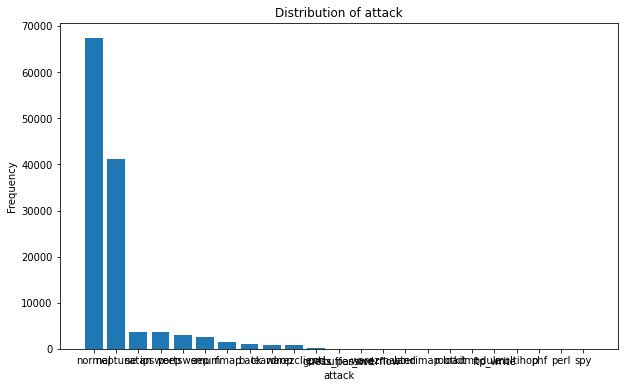

In [16]:
plot_histogram(df_train, 'attack')

### We have a lot of values with a percentage < 1% so grouping the values might help fix it. We can try grouping the attacks based on their type (normal, DoS, U2R, R2L, and Probe)

In [17]:
attack_categories = {
    'normal': 'normal',
    'neptune': 'DoS',
    'back': 'DoS',
    'land': 'DoS',
    'pod': 'DoS',
    'smurf': 'DoS',
    'teardrop': 'DoS',
    'mailbomb': 'DoS',
    'apache2': 'DoS',
    'processtable': 'DoS',
    'udpstorm': 'DoS',
    'worm': 'DoS',
    'buffer_overflow': 'U2R',
    'loadmodule': 'U2R',
    'perl': 'U2R',
    'rootkit': 'U2R',
    'ps': 'U2R',
    'sqlattack': 'U2R',
    'xterm': 'U2R',
    'ftp_write': 'R2L',
    'guess_passwd': 'R2L',
    'imap': 'R2L',
    'multihop': 'R2L',
    'phf': 'R2L',
    'spy': 'R2L',
    'warezclient': 'R2L',
    'warezmaster': 'R2L',
    'sendmail': 'R2L',
    'named': 'R2L',
    'snmpgetattack': 'R2L',
    'snmpguess': 'R2L',
    'xlock': 'R2L',
    'xsnoop': 'R2L',
    'httptunnel': 'R2L',
    'ipsweep': 'Probe',
    'nmap': 'Probe',
    'portsweep': 'Probe',
    'satan': 'Probe',
    'mscan': 'Probe',
    'saint': 'Probe'
}

In [18]:
df_train['attack'] = df_train['attack'].map(attack_categories)
df_test['attack'] = df_test['attack'].map(attack_categories)

       Value  Frequency  Percentage  Cumulative Frequency  \
Rank                                                        
1     normal      67343   53.458281                 67343   
2        DoS      45927   36.457812                113270   
3      Probe      11656    9.252776                124926   
4        R2L        995    0.789852                125921   
5        U2R         52    0.041279                125973   

      Cumulative Percentage  
Rank                         
1                 53.458281  
2                 89.916093  
3                 99.168870  
4                 99.958721  
5                100.000000  


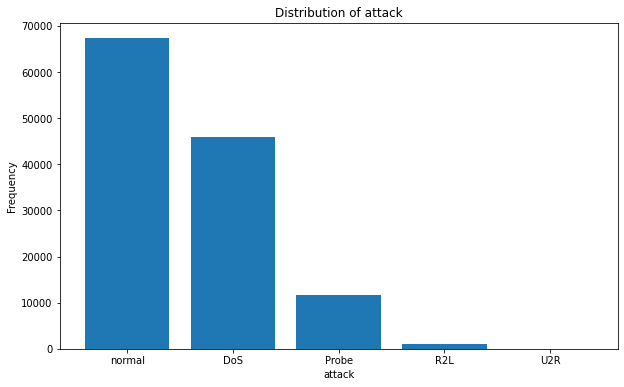

In [19]:
plot_histogram(df_train, 'attack')

      Value  Frequency  Percentage  Cumulative Frequency  \
Rank                                                       
1        21      62557   49.659054                 62557   
2        18      20667   16.405897                 83224   
3        20      19339   15.351702                102563   
4        19      10284    8.163654                112847   
5        15       3990    3.167345                116837   
6        17       3074    2.440205                119911   
7        16       2393    1.899613                122304   
8        12        729    0.578695                123033   
9        14        674    0.535035                123707   
10       11        641    0.508839                124348   
11       13        451    0.358013                124799   
12       10        253    0.200837                125052   
13        9        194    0.154001                125246   
14        7        118    0.093671                125364   
15        8        106    0.084145      

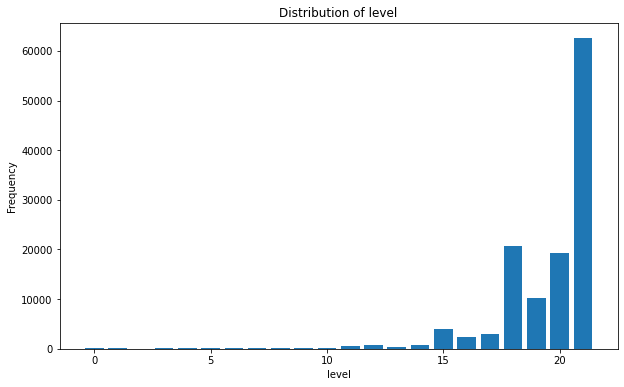

In [20]:
plot_histogram(df_train, 'level')

**The level variable is highly unbalanced with 89.58% of the levels being superior or equal to 18 so we decided to drop it since most of the levels are high**

In [21]:
# 0: No threat or an informational level where no action is required.
# 1 to 5: Low threat levels, which might indicate minimal risk or impact, possibly affecting non-critical systems or involving minimal exploitability.
# 6 to 10: Medium threat levels, possibly affecting systems with moderate importance or presenting a reasonable level of risk if exploited.
# 11 to 15: High threat levels, indicating a significant risk with potential to affect critical systems or data significantly.
# 16 to 20: Very high threat levels, often associated with severe impacts on security, potentially leading to widespread disruption or high-level data breaches.
# 21: Critical threat level, typically used for the most severe and imminent threats that require immediate and comprehensive response
def map_levels(x):
    if x == 21:
        return 21
    elif x >= 16:
        return 20
    elif x >= 11:
        return 15
    elif x >= 6:
        return 10
    elif x >= 1:
        return 5
    else:
        return 0

In [22]:
df_train['level'] = df_train['level'].apply(map_levels)
df_test['level'] = df_test['level'].apply(map_levels)

      Value  Frequency  Percentage  Cumulative Frequency  \
Rank                                                       
1        21      62557   49.659054                 62557   
2        20      55757   44.261072                118314   
3        15       6485    5.147929                124799   
4        10        767    0.608861                125566   
5         5        341    0.270693                125907   
6         0         66    0.052392                125973   

      Cumulative Percentage  
Rank                         
1                 49.659054  
2                 93.920126  
3                 99.068054  
4                 99.676915  
5                 99.947608  
6                100.000000  


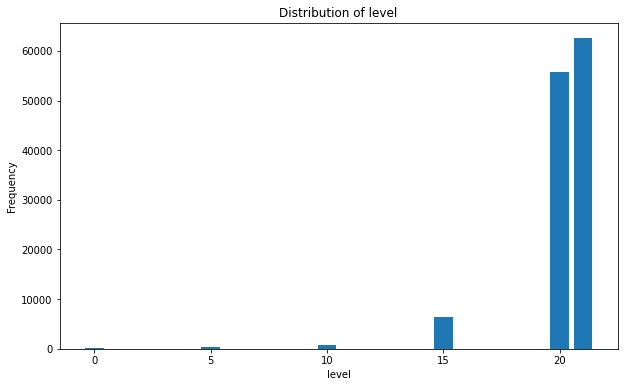

In [23]:
plot_histogram(df_train, 'level')

In [24]:
# df_test.drop(['level'], axis=1, inplace=True)
# df_train.drop(['level'], axis=1, inplace=True)

In [25]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

# **iv. Visualization and Feature Relations**

**Correlation of Features**

In [27]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Assuming df_train is your DataFrame and it's already been imported

# Select numeric columns
numeric_categorical_features = df_train.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = df_train[numeric_categorical_features]

# Calculate the correlation matrix
correlation_matrix = df_numeric_categorical.corr()

# Generate the mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask: set upper triangle to NaN
correlation_matrix.values[mask] = np.nan

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='blues',
    zmin=-1, zmax=1  # Set the scale for correlation values
))

# Update the layout
fig.update_layout(
    title='Correlation Heatmap',
    title_x=0.5,
    width=900, height=900,
    xaxis_showgrid=False, yaxis_showgrid=False,
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear', autorange='reversed')
)

# Show the figure
fig.show()

# Save the figure to a static image file
fig.write_image("correlation_heatmap.png")


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Observations:

* srv_serror_rate and serror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* srv_rerror_rate and rerror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_rerror_rate and dst_host_srv_rerror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_srv_rerror_rate and srv_error_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_serror_rate and dst_host_srv_serror_rate are nearly perfectly correlated positively, they have pretty much the same variance
* dst_host_same_srv_rate and dst_host_srv_count are nearly perfectly correlated positively, they have pretty much the same variance
* root and compromised are nearly perfectly correlated positively, they have pretty much the same variance

### Calculate the Correlation Matrix

In [28]:
# its only for train
numeric_categorical_features = df_train.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = df_train[numeric_categorical_features]
correlation_matrix = df_numeric_categorical.corr()

In [29]:
correlation_matrix

duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.070737   0.034878 -0.001553   
src_bytes                    0.070737   1.000000   0.000204 -0.000109   
dst_bytes                    0.034878   0.000204   1.000000 -0.000069   
land                        -0.001553  -0.000109  -0.000069  1.000000   
wrong_fragment              -0.009866  -0.000693  -0.000440 -0.001261   
urgent                       0.003830  -0.000059   0.000248 -0.000109   
hot                          0.000705   0.000295  -0.000344 -0.001340   
num_failed_logins            0.009528  -0.000208   0.000504 -0.000381   
logged_in                   -0.064218  -0.003353  -0.002894 -0.011402   
num_compromised              0.042679  -0.000086   0.001233 -0.000164   
root_shell                   0.052791  -0.000272   0.001069 -0.000516   
su_attempted                 0.087183  -0.000186   0.001133 -0.000344   
num_root                     0.045519  -0.000093   0.001229 -0.000174   
num_file_creations           0.099116  -0.000179   0.000089 -0.000369   
num_shells                  -0.001593  -0.000134  -0.000083 -0.000262   
num_access_files             0.070420  -0.000309   0.000339 -0.000581   
is_host_login               -0.000258  -0.000022  -0.000008 -0.000040   
is_guest_login               0.000440  -0.000742  -0.000421 -0.001374   
count                       -0.079042  -0.005152  -0.003543 -0.009837   
srv_count                   -0.039470  -0.002792  -0.001754 -0.005031   
serror_rate                 -0.069873  -0.003228  -0.003059  0.021734   
srv_serror_rate             -0.069510  -0.003438  -0.003038  0.022614   
rerror_rate                  0.200682   0.013782   0.011176 -0.004096   
srv_rerror_rate              0.199961   0.013975   0.011052 -0.005275   
same_srv_rate                0.074681   0.003899   0.003788  0.008739   
diff_srv_rate               -0.013738  -0.000432  -0.001703 -0.001551   
srv_diff_host_rate          -0.040158  -0.002608  -0.001674  0.038102   
dst_host_count               0.050570  -0.005791   0.002528 -0.025499   
dst_host_srv_count          -0.109776  -0.006861  -0.004224 -0.014159   
dst_host_same_srv_rate      -0.116005  -0.006572  -0.004424  0.011597   
dst_host_diff_srv_rate       0.254195   0.000900   0.011031 -0.004516   
dst_host_same_src_port_rate  0.228737   0.000431   0.011747  0.033851   
dst_host_srv_diff_host_rate -0.026669  -0.001655  -0.001281  0.070474   
dst_host_serror_rate        -0.064948  -0.004503  -0.003024  0.019840   
dst_host_srv_serror_rate    -0.064361  -0.003397  -0.002944  0.012276   
dst_host_rerror_rate         0.173815  -0.001468   0.011729 -0.005222   
dst_host_srv_rerror_rate     0.199024   0.012449   0.011223 -0.005303   
level                       -0.221738  -0.019808  -0.024673 -0.038837   

                             wrong_fragment    urgent       hot  \
duration                          -0.009866  0.003830  0.000705   
src_bytes                         -0.000693 -0.000059  0.000295   
dst_bytes                         -0.000440  0.000248 -0.000344   
land                              -0.001261 -0.000109 -0.001340   
wrong_fragment                     1.000000 -0.000692 -0.008508   
urgent                            -0.000692  1.000000  0.000293   
hot                               -0.008508  0.000293  1.000000   
num_failed_logins                 -0.002418  0.097507  0.003715   
logged_in                         -0.072418  0.007299  0.116435   
num_compromised                   -0.001044  0.033329  0.002014   
root_shell                        -0.003280  0.075199  0.015379   
su_attempted                      -0.002187  0.097710  0.000130   
num_root                          -0.001108  0.032470  0.001510   
num_file_creations                -0.002343  0.024918  0.028716   
num_shells                        -0.001665 -0.000144  0.004723   
num_access_files                  -0.003689  0.010803 -0.001987   
is_host_login                     -0.00025

###  Identify Redundant Columns

In [30]:
# Threshold for removing correlated variables
threshold = 0.95

# Data structure to store correlation pairs
correlation_pairs = []

# Finding and storing highly correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:  # Absolute value to consider negative correlations
            correlation_pairs.append((correlation_matrix.columns[j], correlation_matrix.columns[i], correlation_matrix.iloc[i, j]))

# Sort pairs by absolute correlation value, descending
correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Determine columns to drop (choosing one from each pair, typically the second in each pair in this implementation)
cols_to_drop = set()
if correlation_pairs:
    # Printing top 2 highest correlations if they exist
    print("Top correlated pairs and the column to drop:")
    for pair in correlation_pairs[:20]:
        print(f"Pair: {pair[0]}, {pair[1]} {pair[2]:.2f}")
        if pair[0] not in cols_to_drop and pair[1] not in cols_to_drop:
            cols_to_drop.add(pair[1])
        elif pair[0] in cols_to_drop and pair[1] not in cols_to_drop:
            cols_to_drop.add(pair[0])
        elif pair[0] not in cols_to_drop and pair[1] in cols_to_drop:
            cols_to_drop.add(pair[1])
        elif pair[0] in cols_to_drop and pair[1] in cols_to_drop:
            continue
        # print(f"Planning to drop: {pair[1]}")

# Print all columns to drop
print("Columns to drop based on all identified pairs:", cols_to_drop)

Top correlated pairs and the column to drop:
Pair: num_compromised, num_root 1.00
Pair: serror_rate, srv_serror_rate 0.99
Pair: rerror_rate, srv_rerror_rate 0.99
Pair: srv_serror_rate, dst_host_srv_serror_rate 0.99
Pair: dst_host_serror_rate, dst_host_srv_serror_rate 0.99
Pair: serror_rate, dst_host_srv_serror_rate 0.98
Pair: serror_rate, dst_host_serror_rate 0.98
Pair: srv_serror_rate, dst_host_serror_rate 0.98
Pair: srv_rerror_rate, dst_host_srv_rerror_rate 0.97
Pair: rerror_rate, dst_host_srv_rerror_rate 0.96
Columns to drop based on all identified pairs: {'num_root', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate'}


### drop

In [31]:
df_train = df_train.drop(cols_to_drop, axis=1)
df_test = df_test.drop(cols_to_drop, axis=1)

In [32]:
df_train

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                    0       0    0                  0          0   
1                    0       0    0                  0          0   
2                    0       0    0                  0          0   
3                    0       0    0                  0          1   
4                    0       0    0                  0          1   
...                ...     ...  ...                ...        ...   
125968               0       0    0                  0          0   
125969               0       0    0                  0          0   
125970               0       0    0                  0          1   
125971               0       0    0                  0          0   
125972               0       0    0                  0          1   

        num_compromised  root_shell  su_attempted  num_file_creations  \
0                     0           0             0                   0   
1                     0           0             0                   0   
2                     0           0             0                   0   
3                     0           0             0                   0   
4                     0           0             0                   0   
...                 ...         ...           ...                 ...   
125968                0           0             0                   0   
125969                0           0             0                   0   
125970                0           0             0                   0   
125971                0           0             0                   0   
125972                0           0             0                   0   

        num_shells  num_access_files  is_host_login  is_guest_login  count  \
0                0                 0              0               0      2   
1                0                 0              0               0     13   
2                0                 0              0               0    123   
3                0                 0              0               0      5   
4                0                 0              0               0     30   
...            ...               ...            ...             ...    ...   
125968           0                 0              0               0    184   
125969           0                 0              0               0      2   
125970           0                 0              0               0      1   
125971           0                 0              0               0    144   
125972           0                 0              0               0      1   

        srv_count  serror_rate  rerror_rate  same_srv_rate  diff_srv_rate  \
0               2          0.0          0.0           1.00           0.00   
1               1          0.0          0.0           0.08           0.15   
2               6          1.0          0.0           0.05           0.07   
3               5          0.2          0.0           1.00           0.00   
4              32          0.0          0.0           1

In [33]:
df_test

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp      smtp    SF        794        333     0   
22540         0           tcp      http    SF        317        938     0   
22541         0           tcp      http    SF      54540       8314     0   
22542         0           udp  domain_u    SF         42         42     0   
22543         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                   0       0    0                  0          0   
1                   0       0    0                  0          0   
2                   0       0    0                  0          0   
3                   0       0    0                  0          0   
4                   0       0    0                  0          0   
...               ...     ...  ...                ...        ...   
22539               0       0    0                  0          1   
22540               0       0    0                  0          1   
22541               0       0    2                  0          1   
22542               0       0    0                  0          0   
22543               0       0    0                  0          0   

       num_compromised  root_shell  su_attempted  num_file_creations  \
0                    0           0             0                   0   
1                    0           0             0                   0   
2                    0           0             0                   0   
3                    0           0             0                   0   
4                    0           0             0                   0   
...                ...         ...           ...                 ...   
22539                0           0             0                   0   
22540                0           0             0                   0   
22541                1           0             0                   0   
22542                0           0             0                   0   
22543                0           0             0                   0   

       num_shells  num_access_files  is_host_login  is_guest_login  count  \
0               0                 0              0               0    229   
1               0                 0              0               0    136   
2               0                 0              0               0      1   
3               0                 0              0               0      1   
4               0                 0              0               0      1   
...           ...               ...            ...             ...    ...   
22539           0                 0              0               0      1   
22540           0                 0              0               0      2   
22541           0                 0              0               0      5   
22542           0                 0              0               0      4   
22543           0                 0              0               0      4   

       srv_count  serror_rate  rerror_rate  same_srv_rate  diff_srv_rate  \
0             10          0.0          1.0           0.04           0.06   
1              1          0.0          1.0           0.01           0.06   
2              1          0.0          0.0           1.00           0.00   
3             65          0.0          0.0           1.00           0.00   
4              8          0.0          1.0           1.00           0.00   
...          ...   

**We removed some variables based on high corrolation**

**Categorical variables**

In [34]:
def plot_histograms(df, feature, x=10, y=10, title=True):
    unique_features = df[feature].unique()
    value_frequencies = df[feature].value_counts()
    sorted_features = value_frequencies.index.tolist()
    num_plots = len(unique_features)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(x, y))
    
    if title:
        fig.suptitle(f"Distribution of attack for each {feature}", fontsize=14, ha='center')
    
    for i, feat in enumerate(sorted_features):
        feat_df = df[df[feature] == feat]
        unique_attacks = feat_df['attack'].unique()
        
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.histplot(feat_df['attack'], bins=len(unique_attacks), ax=ax)
        ax.set_xlabel('Attack')
        ax.set_ylabel('Frequency')
        ax.set_title(f'{feature}: {feat}')
    
    # Remove any empty subplots
    if num_plots < num_rows * num_cols:
        empty_plots = num_rows * num_cols - num_plots
        for i in range(num_plots, num_plots + empty_plots):
            fig.delaxes(axes[i // num_cols, i % num_cols])
    
    plt.tight_layout()
    plt.show()

In [35]:
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['protocol_type', 'service', 'flag', 'attack']


In [36]:
df_train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

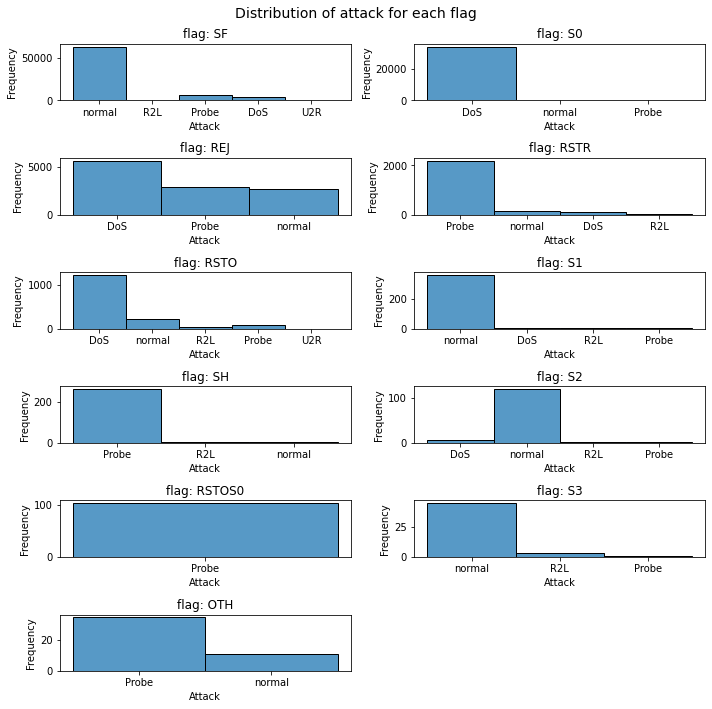

In [37]:
plot_histograms(df_train, 'flag')

       Value  Frequency  Percentage  Cumulative Frequency  \
Rank                                                        
1         SF      74945   59.492907                 74945   
2         S0      34851   27.665452                109796   
3        REJ      11233    8.916990                121029   
4       RSTR       2421    1.921840                123450   
5       RSTO       1562    1.239948                125012   
6         S1        365    0.289745                125377   
7         SH        271    0.215125                125648   
8         S2        127    0.100815                125775   
9     RSTOS0        103    0.081764                125878   
10        S3         49    0.038897                125927   
11       OTH         46    0.036516                125973   

      Cumulative Percentage  
Rank                         
1                 59.492907  
2                 87.158359  
3                 96.075349  
4                 97.997190  
5                 99.23713

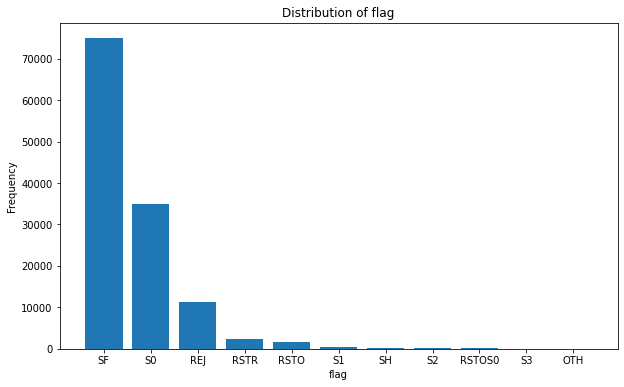

In [38]:
plot_histogram(df_train, 'flag')

In [39]:
df_train['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

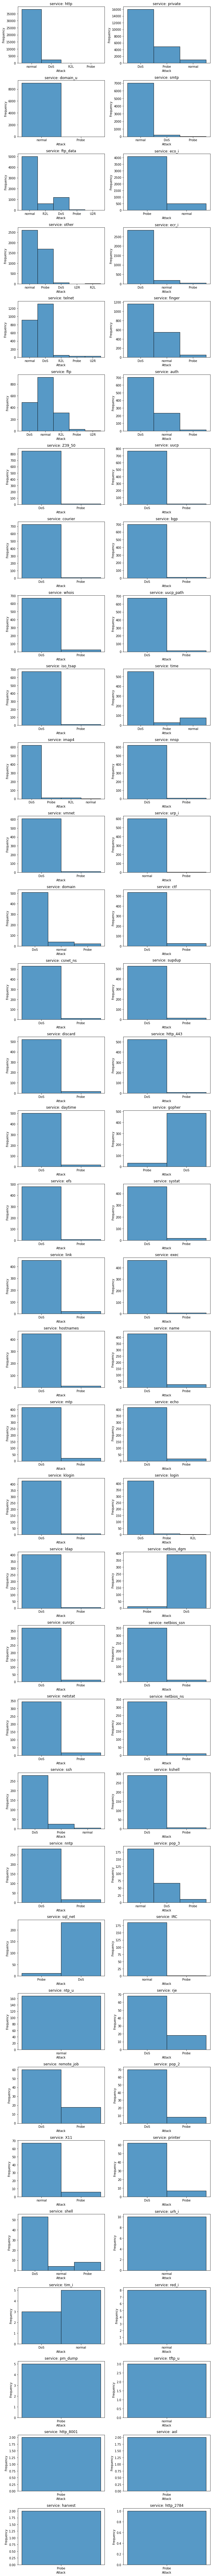

In [40]:
plot_histograms(df_train, 'service', 10, 120, False)

In [ ]:
# pd.set_option('display.max_rows', 100)
# plot_histogram(df_train, 'service', 50, 20)

In [41]:
df_train['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

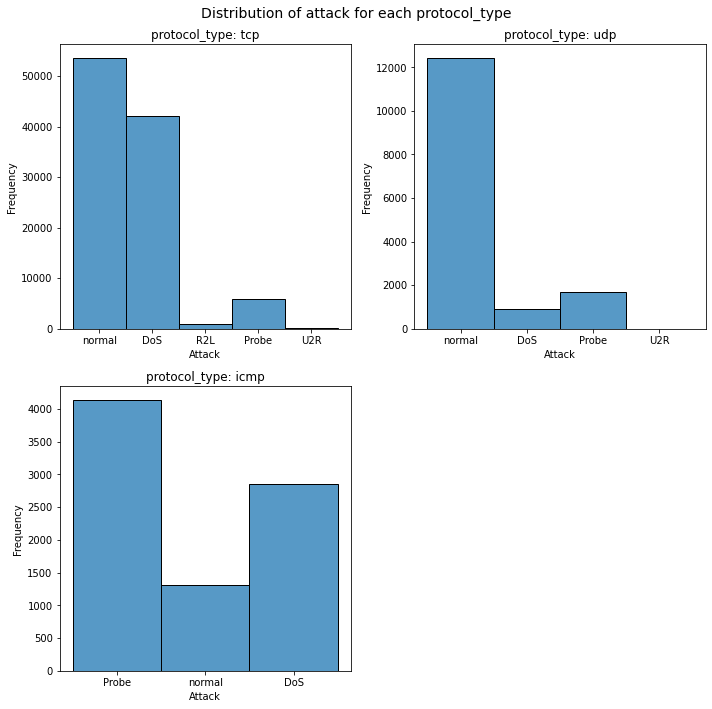

In [42]:
plot_histograms(df_train, 'protocol_type')

**All of the categorical variables are highly unbalanced**

In [43]:
df_train.keys()

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'attack',
       'level'],
      dtype='object')

**Numerical variables**

In [44]:
def plot_scatterplots(df, target_variable='attack', x=10, y=6):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    num_plots = len(numerical_columns)
    num_cols = 2  # Number of columns in the grid
    num_rows = (num_plots + 1) // num_cols  # Number of rows in the grid
    
    target_codes, target_labels = pd.factorize(df[target_variable])

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(x, y))
    fig.tight_layout(pad=4.0)

    for i, column in enumerate(numerical_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        ax.scatter(df[column], target_codes, c=target_codes, cmap='viridis')
        ax.set_xlabel(column)
        ax.set_ylabel(target_variable)
        ax.set_yticks(np.arange(len(target_labels)))
        ax.set_yticklabels(target_labels)
        ax.set_title(f'{column} vs {target_variable}')

    plt.show()

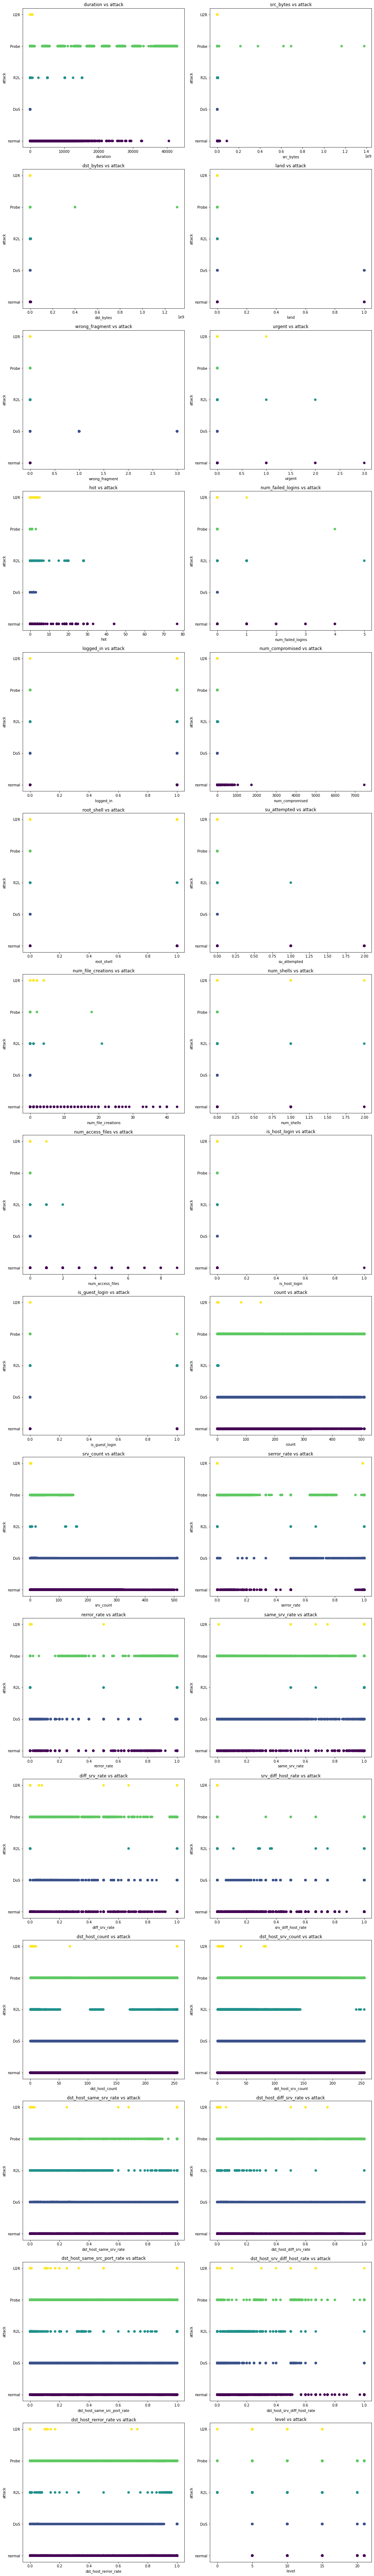

In [45]:
plot_scatterplots(df_train,x=15,y=100)

**We cab some outliers in the numerical variables which could help us detect the anomalities**

In [46]:
import math

def showBoxplot(df, features):
    num_plots = len(features)
    num_rows = math.ceil(math.sqrt(num_plots))
    num_cols = math.ceil(num_plots / num_rows)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.5)

    if num_plots % num_cols != 0:
        empty_plots = num_cols - (num_plots % num_cols)
        for i in range(empty_plots):
            fig.delaxes(axes[-1, -1 - i])

    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row][col] if num_rows > 1 else axes[col]

        ax.boxplot(df[feature])
        ax.set_title(feature)

    plt.tight_layout()
    plt.show()

In [47]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'attack',
       'level'],
      dtype='object')

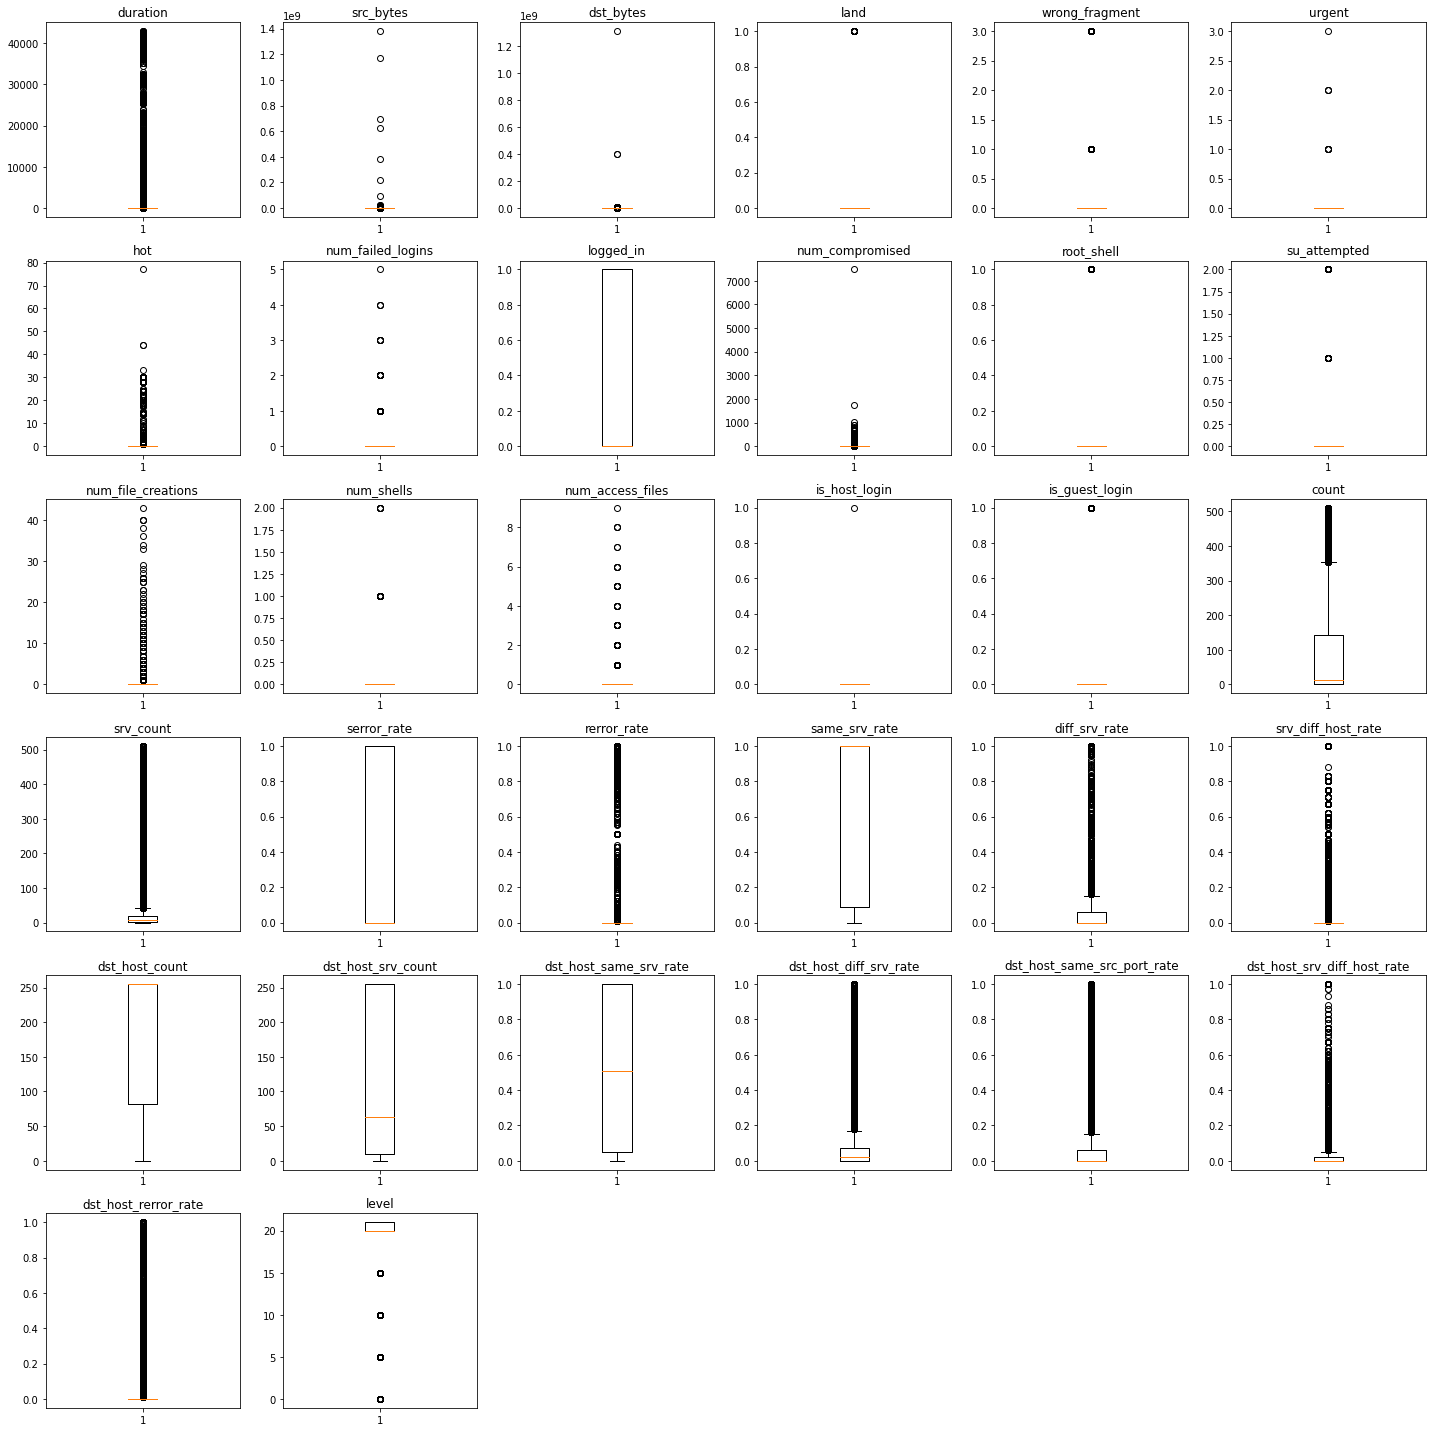

In [48]:
numeric_features = df_train.select_dtypes(include=['int', 'float']).columns
showBoxplot(df_train, numeric_features)

In [49]:
def generate_stats_table(column):
    # Value counts for frequency, sorted by index for numeric data
    frequency = column.value_counts().sort_index()
    # Cumulative frequency
    cumulative_frequency = frequency.cumsum()
    # Percentage of occurrence
    percentage = (frequency / len(column)) * 100
    
    # Creating the statistics table
    stats_table = pd.DataFrame({
        'Value': frequency.index,
        'Frequency': frequency.values,
        'Cumulative Frequency': cumulative_frequency.values,
        'Percentage': percentage.values
    })
    
    return stats_table

In [50]:
numeric_columns = df_train.select_dtypes(include=['number'])

In [51]:
numeric_columns.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'level'],
      dtype='object')

In [52]:
# # Dictionary to hold the stats table for each numeric column
# stats_tables = {}

# # Generate stats table for each numeric column
# for col in numeric_columns:
    # stats_tables[col] = generate_stats_table(df[col])
generate_stats_table(df_train['wrong_fragment'])

Value  Frequency  Cumulative Frequency  Percentage
0      0     124883                124883   99.134735
1      1        206                125089    0.163527
2      3        884                125973    0.701738

In [53]:
specific_value = 1
filtered_rows = df_train[df_train['wrong_fragment'] == specific_value]

In [54]:
filtered_rows['attack'].unique()

array(['DoS'], dtype=object)

In [55]:
# 'urgent' #Dropping this feature because the majority of the values (0.99) takes value 0
df_test.drop(['urgent'], axis=1, inplace=True)
df_train.drop(['urgent'], axis=1, inplace=True)

In [56]:
df_train

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  hot  num_failed_logins  logged_in  num_compromised  \
0                    0    0                  0          0                0   
1                    0    0                  0          0                0   
2                    0    0                  0          0                0   
3                    0    0                  0          1                0   
4                    0    0                  0          1                0   
...                ...  ...                ...        ...              ...   
125968               0    0                  0          0                0   
125969               0    0                  0          0                0   
125970               0    0                  0          1                0   
125971               0    0                  0          0                0   
125972               0    0                  0          1                0   

        root_shell  su_attempted  num_file_creations  num_shells  \
0                0             0                   0           0   
1                0             0                   0           0   
2                0             0                   0           0   
3                0             0                   0           0   
4                0             0                   0           0   
...            ...           ...                 ...         ...   
125968           0             0                   0           0   
125969           0             0                   0           0   
125970           0             0                   0           0   
125971           0             0                   0           0   
125972           0             0                   0           0   

        num_access_files  is_host_login  is_guest_login  count  srv_count  \
0                      0              0               0      2          2   
1                      0              0               0     13          1   
2                      0              0               0    123          6   
3                      0              0               0      5          5   
4                      0              0               0     30         32   
...                  ...            ...             ...    ...        ...   
125968                 0              0               0    184         25   
125969                 0              0               0      2          2   
125970                 0              0               0      1          1   
125971                 0              0               0    144          8   
125972                 0              0               0      1          1   

        serror_rate  rerror_rate  same_srv_rate  diff_srv_rate  \
0               0.0          0.0           1.00           0.00   
1               0.0          0.0           0.08           0.15   
2               1.0          0.0           0.05           0.07   
3               0.2          0.0           1.00           0.00   
4               0.0          0.0           1.00           0.00   
...     

# **v. Encoding and Normalization**

In [57]:
categorical_columns = ['protocol_type', 'service', 'flag']

sampled_df_train_encoded = pd.get_dummies(df_train, columns=categorical_columns)
df_test_encoded = pd.get_dummies(df_test, columns=categorical_columns)

sampled_df_train_encoded, df_test_encoded = sampled_df_train_encoded.align(df_test_encoded, axis=1, join='inner')

In [58]:
sampled_df_train_encoded

duration  src_bytes  dst_bytes  land  wrong_fragment  hot  \
0              0        491          0     0               0    0   
1              0        146          0     0               0    0   
2              0          0          0     0               0    0   
3              0        232       8153     0               0    0   
4              0        199        420     0               0    0   
...          ...        ...        ...   ...             ...  ...   
125968         0          0          0     0               0    0   
125969         8        105        145     0               0    0   
125970         0       2231        384     0               0    0   
125971         0          0          0     0               0    0   
125972         0        151          0     0               0    0   

        num_failed_logins  logged_in  num_compromised  root_shell  \
0                       0          0                0           0   
1                       0          0                0           0   
2                       0          0                0           0   
3                       0          1                0           0   
4                       0          1                0           0   
...                   ...        ...              ...         ...   
125968                  0          0                0           0   
125969                  0          0                0           0   
125970                  0          1                0           0   
125971                  0          0                0           0   
125972                  0          1                0           0   

        su_attempted  num_file_creations  num_shells  num_access_files  \
0                  0                   0           0                 0   
1                  0                   0           0                 0   
2                  0                   0           0                 0   
3                  0                   0           0                 0   
4                  0                   0           0                 0   
...              ...                 ...         ...               ...   
125968             0                   0           0                 0   
125969             0                   0           0                 0   
125970             0                   0           0                 0   
125971             0                   0           0                 0   
125972             0                   0           0                 0   

        is_host_login  is_guest_login  count  srv_count  serror_rate  \
0                   0               0      2          2          0.0   
1                   0               0     13          1          0.0   
2                   0               0    123          6          1.0   
3                   0               0      5          5          0.2   
4                   0               0     30         32          0.0   
...               ...             ...    ...        ...          ...   
125968              0               0    184         25          1.0   
125969              0               0      2          2          0.0   
125970              0               0      1          1          0.0   
125971              0               0    144          8          1.0   
125972              0               0      1          1          0.0   

        rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0               0.0           1.00           0.00                0.00   
1               0.0           0.08           0.15                0.00   
2               0.0           0.05           0.07                0.00   
3               0.0           1.00           0.00                0.00   
4               0.0           1.00           0.00                0.09   
...             ...            ...            ...                 ...   
125968          0.0           0.14           0.06                0.00   
125969      

In [59]:
df_test_encoded

duration  src_bytes  dst_bytes  land  wrong_fragment  hot  \
0             0          0          0     0               0    0   
1             0          0          0     0               0    0   
2             2      12983          0     0               0    0   
3             0         20          0     0               0    0   
4             1          0         15     0               0    0   
...         ...        ...        ...   ...             ...  ...   
22539         0        794        333     0               0    0   
22540         0        317        938     0               0    0   
22541         0      54540       8314     0               0    2   
22542         0         42         42     0               0    0   
22543         0          0          0     0               0    0   

       num_failed_logins  logged_in  num_compromised  root_shell  \
0                      0          0                0           0   
1                      0          0                0           0   
2                      0          0                0           0   
3                      0          0                0           0   
4                      0          0                0           0   
...                  ...        ...              ...         ...   
22539                  0          1                0           0   
22540                  0          1                0           0   
22541                  0          1                1           0   
22542                  0          0                0           0   
22543                  0          0                0           0   

       su_attempted  num_file_creations  num_shells  num_access_files  \
0                 0                   0           0                 0   
1                 0                   0           0                 0   
2                 0                   0           0                 0   
3                 0                   0           0                 0   
4                 0                   0           0                 0   
...             ...                 ...         ...               ...   
22539             0                   0           0                 0   
22540             0                   0           0                 0   
22541             0                   0           0                 0   
22542             0                   0           0                 0   
22543             0                   0           0                 0   

       is_host_login  is_guest_login  count  srv_count  serror_rate  \
0                  0               0    229         10          0.0   
1                  0               0    136          1          0.0   
2                  0               0      1          1          0.0   
3                  0               0      1         65          0.0   
4                  0               0      1          8          0.0   
...              ...             ...    ...        ...          ...   
22539              0               0      1          1          0.0   
22540              0               0      2         11          0.0   
22541              0               0      5         10          0.0   
22542              0               0      4          6          0.0   
22543              0               0      4         10          0.0   

       rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0              1.0           0.04           0.06                0.00   
1              1.0           0.01           0.06                0.00   
2              0.0           1.00           0.00                0.00   
3              0.0           1.00           0.00                1.00   
4              1.0           1.00           0.00                0.75   
...            ...            ...            ...                 ...   
22539          0.0           1.00           0.00                0.00   
22540          0.0           1.00           0.00                0.1

In [68]:
sampled_df_train_encoded.to_csv('NSL-KDD_Processed_Train.csv', index=False)

In [69]:
df_test_encoded.to_csv('NSL-KDD_Processed_Test.csv', index=False)